In [87]:
# ! nvidia-smi
from keras.datasets import cifar10
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import logging
from sklearn.metrics import classification_report, confusion_matrix
from time import time
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image
import random


tf.autograph.set_verbosity(0, False)
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# Q1 - Pattern Association using Hebbian Learning Rule

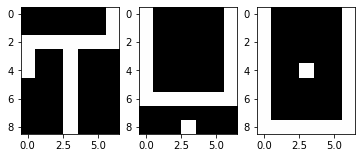

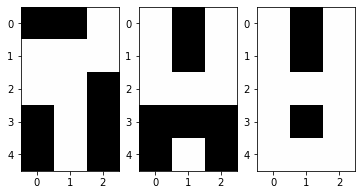

((3, 63), (3, 15))

In [39]:
input_1 = np.array([
    -1,-1,-1,-1,-1,-1,1,
    -1,-1,-1,-1,-1,-1,1,
    1,1,1,1,1,1,1,
    1,-1,-1,1,-1,-1,-1,
    1,-1,-1,1,-1,-1,-1,
    -1,-1,-1,1,-1,-1,-1,
    -1,-1,-1,1,-1,-1,-1,
    -1,-1,-1,1,-1,-1,-1,
    -1,-1,-1,1,-1,-1,-1,
])
input_2 = np.array([
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,1,1,1,1,1,1,
    -1,-1,-1,-1,-1,-1,-1,
    -1,-1,-1,1,-1,-1,-1,
])
input_3 = np.array([
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,1,1,1,1,1,1,
])
output_1 = np.array([
    -1,-1,1,
    1,1,1,
    1,1,-1,
    -1,1,-1,
    -1,1,-1,
])
output_2 = np.array([
    1,-1,1,
    1,-1,1,
    1,1,1,
    -1,-1,-1,
    -1,1,-1
])
output_3 = np.array([
    1,-1,1,
    1,-1,1,
    1,1,1,
    1,-1,1,
    1,1,1
])

def draw(image):
    if len(image) == 63:
        image = (image.reshape(9, 7) + 1) * 127
    elif len(image) == 15:
        image = (image.reshape(5, 3) + 1) * 127
    img = Image.fromarray(image)
    plt.imshow(img)
    
def draw_images(arrays):
    for i in range(len(arrays)):
        plt.subplot(1, 3, i + 1)
        draw(arrays[i])
    plt.show()

inputs = np.array([input_1, input_2, input_3])
outputs = np.array([output_1, output_2, output_3])

draw_images(inputs)
draw_images(outputs)
inputs.shape, outputs.shape

## 2)

In [78]:
class HebbTrainer:
    def __init__(self, input_size: int, output_size: int):
        self.weights = np.zeros((input_size, output_size))

    def train(self, inputs, outputs):
        for i, o in zip(inputs, outputs):
            i = i.reshape(1, -1)
            o = o.reshape(1, -1)
            self.weights += i.T @ o
    
    def predict(self, i):
        i = i.reshape(1, -1)
        pred = (i @ self.weights).reshape(-1)
        pred[pred >= 0] = 1
        pred[pred < 0] = -1
        return pred

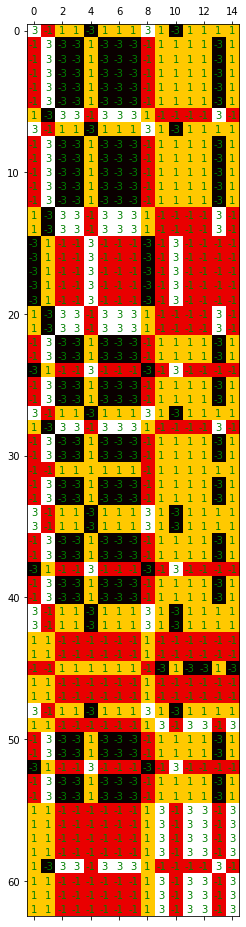

In [79]:
hebb = HebbTrainer(inputs.shape[1], outputs.shape[1])
hebb.train(inputs, outputs)

def draw_matrix(mat):
    plt.matshow(mat, cmap=plt.cm.hot)
    for (x, y), value in np.ndenumerate(mat.T):
        plt.text(x, y, f"{value:.0f}", va="center", ha="center", color="green")
    plt.show()
    
draw_matrix(hebb.weights)

## 3)

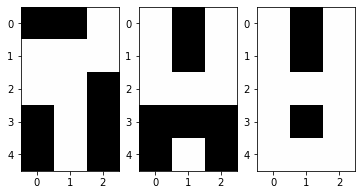

Accuracy: 1.0


In [88]:
def compute_accuracy(true, preds):
    tp, all = 0, 0
    for i in range(len(preds)):
        for j in range(len(preds[i])):
            if preds[i][j] == true[i][j]:
                tp += 1
            all += 1
    return tp / all

preds = [hebb.predict(i) for i in inputs]
draw_images(preds)
print("Accuracy:", compute_accuracy(outputs, preds))

## 4)

In [86]:
np.dot(outputs[0], outputs[2])

-1

## 5) Noise

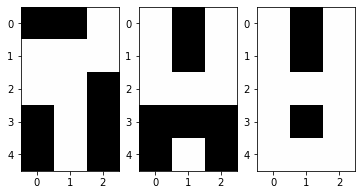

Noise 20% - Accuracy: 1.0


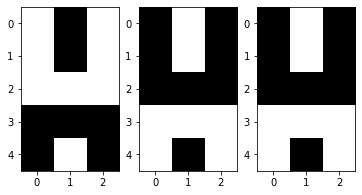

Noise 60% - Accuracy: 0.3333333333333333


In [122]:
def add_noise(array, noise_ratio=0.2):
    array = np.copy(array)
    for i in range(len(array)):
        for j in range(len(array[i])):
            if random.random() < noise_ratio:
                array[i][j] *= -1
    return array
                
noisy_inputs = add_noise(inputs, noise_ratio=0.2)
preds = [hebb.predict(i) for i in noisy_inputs]
draw_images(preds)
print("Noise 20% - Accuracy:", compute_accuracy(outputs, preds))

noisy_inputs = add_noise(inputs, noise_ratio=0.6)
preds = [hebb.predict(i) for i in noisy_inputs]
draw_images(preds)
print("Noise 60% - Accuracy:", compute_accuracy(outputs, preds))

## 6) Loss

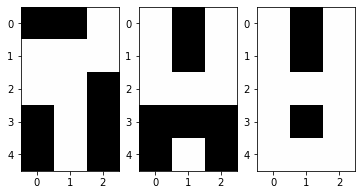

Loss 20% - Accuracy: 1.0


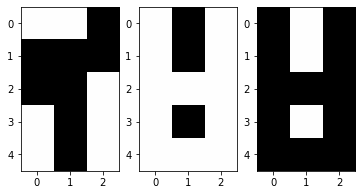

Loss 60% - Accuracy: 0.24444444444444444


In [112]:
def add_loss(array, noise_ratio=0.2):
    array = np.copy(array)
    for i in range(len(array)):
        for j in range(len(array[i])):
            if random.random() < noise_ratio:
                array[i][j] = 0
    return array

noisy_inputs = add_loss(inputs, noise_ratio=0.2)
preds = [hebb.predict(i) for i in noisy_inputs]
draw_images(preds)
print("Loss 20% - Accuracy:", compute_accuracy(outputs, preds))

noisy_inputs = add_noise(inputs, noise_ratio=0.6)
preds = [hebb.predict(i) for i in noisy_inputs]
draw_images(preds)
print("Loss 60% - Accuracy:", compute_accuracy(outputs, preds))